In [35]:
import tensorflow as tf

# Loading MNIST DATASET
### Training Samples: 60,000     # Testing Samples: 10,000


In [36]:
mnist = tf.keras.datasets.mnist

# Dividing training and test Dataset

In [37]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [38]:
x_train.shape # 60000 images with 28x28 size

(60000, 28, 28)

In [39]:
import matplotlib.pyplot as plt

# Visualizing a sample data

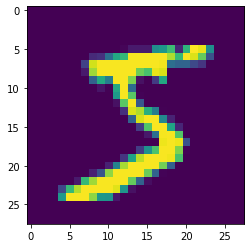

In [40]:
plt.imshow(x_train[0]) #using the plt, imshow shows image of the sample
plt.show()

### Visualizing a sample data (in Binary)

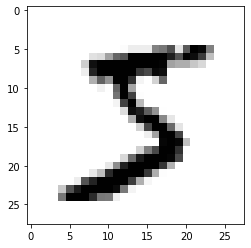

In [41]:
plt.imshow(x_train[0], cmap = plt.cm.binary)

### Checking values for pixel

In [42]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

# Preprocessing (Normalizing the Data)

### Normalization is done to avoid problems regarding any change in color.

In [43]:
x_train = tf.keras.utils.normalize(x_train, axis =1) #normalizing training dataset
x_test = tf.keras.utils.normalize(x_test, axis =1) #normalizing testing dataset

### Visualization following Normalziation

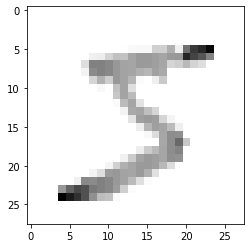

In [44]:
plt.imshow(x_train[0], cmap= plt.cm.binary)

In [45]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

### Resize image suitable for Convolution Operation

In [46]:
import numpy as np
IMG_SIZE= x_train.shape[2] # as seen previously
#increasing dimension for kernel operation
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 

In [49]:
print(x_trainr.shape)
print(x_testr.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# Creating Deep Neural Network
### Here, we train the 60000 samples of MNIST handwritten dataset

In [50]:
from tensorflow.keras.models import Sequential #the model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

### Creating the neural network

In [52]:
model = Sequential()

#First Convolution Layer for input layer sizes:
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:]))
#Activation function to make it non-linear:
model.add(Activation("relu"))
#MAXpooling:
model.add(MaxPooling2D(pool_size = (2,2)))

#Second Convolution Layer:
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:]))
#Activation function to make it non-linear:
model.add(Activation("relu"))
#MAXpooling:
model.add(MaxPooling2D(pool_size = (2,2)))

#Third Convolution Layer:
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:]))
#Activation function to make it non-linear:
model.add(Activation("relu"))
#MAXpooling:
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten()) #converting 2D -> 1D, before using fully connected layer

#1st Fully Connected Layer:
model.add(Dense(64))
model.add(Activation("relu"))

#2nd Fully Connected Layer:
model.add(Dense(32))
model.add(Activation("relu"))

#3rd(Final) Fully Connected Layer:
model.add(Dense(10)) #Since there are 10 classes 0-9
model.add(Activation("softmax")) #sigmoid if binary classification

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

# Compiling Model

In [54]:
model.compile(loss= "sparse_categorical_crossentropy", optimizer = "adam", metrics=['accuracy'])

# Training Model

In [55]:
model.fit(x_trainr, y_train, epochs = 5, validation_split=0.3 )

Epoch 1/5
1313/1313 [==============================] - 96s 73ms/step - loss: 0.3246 - accuracy: 0.8966 - val_loss: 0.1417 - val_accuracy: 0.9577
Epoch 2/5
1313/1313 [==============================] - 60s 46ms/step - loss: 0.0984 - accuracy: 0.9698 - val_loss: 0.0898 - val_accuracy: 0.9726
Epoch 3/5
1313/1313 [==============================] - 36s 27ms/step - loss: 0.0700 - accuracy: 0.9777 - val_loss: 0.0794 - val_accuracy: 0.9754
Epoch 4/5
1313/1313 [==============================] - 32s 25ms/step - loss: 0.0560 - accuracy: 0.9824 - val_loss: 0.0663 - val_accuracy: 0.9795
Epoch 5/5
1313/1313 [==============================] - 32s 25ms/step - loss: 0.0456 - accuracy: 0.9851 - val_loss: 0.0602 - val_accuracy: 0.9829


In [56]:
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test Loss on 10000 Test Samples: ", test_loss)
print("Validation Accuracy on 10000 Test Samples ", test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0609 - accuracy: 0.9826
Test Loss on 10000 Test Samples:  0.06094325706362724
Validation Accuracy on 10000 Test Samples  0.9825999736785889


# Testing the Model

In [57]:
predictions = model.predict([x_testr])

### Softmax Predictions in array

In [58]:
print(predictions)

[[1.0223017e-06 1.4055141e-07 1.7302733e-05 ... 9.9998021e-01
  1.4216018e-07 5.7571310e-07]
 [6.4698499e-05 2.5647432e-06 9.9982196e-01 ... 1.0951513e-05
  6.4062355e-05 2.0707387e-06]
 [4.1129515e-06 9.9946171e-01 1.0854833e-05 ... 3.8880400e-05
  9.6874228e-06 7.4762033e-07]
 ...
 [1.4583620e-13 4.3275975e-08 5.3136373e-10 ... 8.3240842e-08
  1.0139979e-06 3.7689704e-05]
 [4.1772506e-07 9.5484942e-10 2.4432409e-10 ... 2.6317564e-09
  1.1760407e-05 6.1433054e-09]
 [2.1274138e-04 6.1704867e-08 2.2112754e-05 ... 7.2108554e-07
  1.4735195e-04 3.1041750e-06]]


### Converting the predictions from one hot encoding, we use numpy

In [59]:
print(np.argmax(predictions[0]))

7


### Check if the value was indeed '7' ?

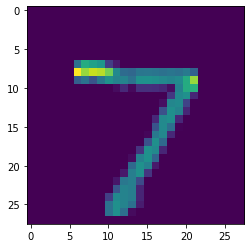

In [60]:
plt.imshow(x_test[0]) # since 0 was the index we predicted and printed in the prev. line

# Check by creating one of your writing 
### Import the image handWrittenNumber.png and run the lines of code below to classify the number

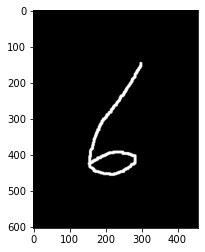

In [77]:
import cv2
img = cv2.imread('handWrittenNumber.png')
plt.imshow(img)

### Converting to proper shape using cv2 library

In [78]:
gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(604, 458)

### Resizing 

In [79]:
resized_img = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
new_img = tf.keras.utils.normalize(resized_img, axis=1) #normalizing
new_img = np.array(new_img).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #kernel operation for convolution layer


In [80]:
predictions = model.predict(new_img)
print(np.argmax(predictions))

6
